# PRACTICAL 2: To implement and explore the cost function for simple linear regression

**Problem Statement:**

**Using the same data as in Practical 1, your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters w, b, which will accurately predict house values given an input x. The cost is a measure of how accurate the model is on the training data. The cost function shows that if w and b can be selected such that the predictions $f_{w,b}(x)$ match the target data y, then the $(f_{w,b}(x) - y)^2$ term will be zero and the cost minimized. In the previous lab, we determined that b = 100 provided an optimal solution so let's set b to 100 and focus on w.**

In [1]:
# initializing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# making dataframe for the given training data

df = pd.DataFrame(data = {'Size in feet$^2$':[1000,2000],'Price in \$1000(s)':[300,500]})
df

,Size in feet$^2$,Price in \$1000(s)
0,1000,300
1,2000,500


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fitting linear regression model on the training data

x_train,y_train = np.array(df['Size in feet$^2$']).reshape(-1,1),np.array(df['Price in \\$1000(s)'])
model.fit(x_train,y_train)

LinearRegression()

In [5]:
# computing the cost function for varying values of w

def Compute_Cost(x,y,m,w,b):
    j=0
    for i in range(0,m):
        j = j +  ((w*x[i][0] + b) - y[i])**2
    j = j/(2*m)
    return j

k=0
J = np.arange(-1,1.41,0.02)

for w in np.arange(-1,1.41,0.02):
    J[k] = Compute_Cost(x_train,y_train,2,w,model.intercept_)
    k=k+1

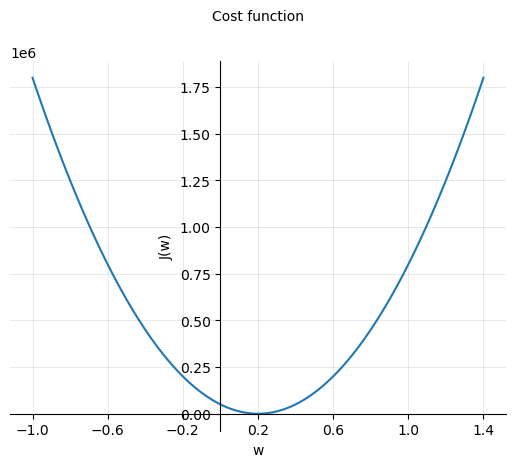

In [6]:
# plotting curve for the cost function

fig,ax = plt.subplots(1,1)

ax.plot(np.arange(-1,1.41,0.02),J)
ax.grid(True)
ax.grid(alpha=0.4,lw=0.5)
ax.set_xlabel('w')
ax.set_ylabel('J(w)')
ax.set_title('Cost function\n\n',fontsize=10)

# x tick labels
ax.set_xticks([-1,-0.6,-0.2,0.2,0.6,1,1.4])
# x axis passes through origin
ax.spines['bottom'].set_position(('data',0))
# y axis passes through origin
ax.spines['left'].set_position(('data',0))
# turning off right and top axis spines
for pos in ['right','top']:
    ax.spines[pos].set_visible(False)
    
plt.show()

In [7]:
# Thus, w = 0.2 is the ideal value for this model because J(0.2) = 0